#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.
 
### CHAPTER 12
**CH12 Returns on a company stock and market returns**

version 1.0 2021-05-31
 
 

In [62]:
import os
import sys
import warnings
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from mizani.breaks import date_breaks
from mizani.formatters import date_format
from mizani.formatters import percent_format
from plotnine import *
from stargazer.stargazer import Stargazer

warnings.filterwarnings("ignore")


In [65]:
stock_data = pd.read_csv("/workspaces/codespaces-jupyter/data/ready_sp500_45_cos.csv")
sp500_index = pd.read_csv("/workspaces/codespaces-jupyter/data/ready_sp500_index.csv")

In [88]:
stock_data

,ticker,ref.date,price.open,price.close,price.adjusted,price.low,price.high,volume
0,ACN,2001-07-19,15.100000,15.170000,11.497672,15.000000,15.290000,34994300.0
1,ACN,2001-07-20,15.050000,15.010000,11.376402,14.800000,15.050000,9238500.0
2,ACN,2001-07-23,15.000000,15.000000,11.368821,14.550000,15.010000,7501000.0
3,ACN,2001-07-24,14.950000,14.860000,11.262713,14.700000,14.970000,3537300.0
4,ACN,2001-07-25,14.700000,14.950000,11.330926,14.650000,14.950000,4208100.0
...,...,...,...,...,...,...,...,...
304854,XLNX,2018-12-26,79.889999,85.220001,84.371185,79.669998,85.279999,2780600.0
304855,XLNX,2018-12-27,83.639999,84.300003,83.460358,81.070000,84.419998,2684100.0
304856,XLNX,2018-12-28,84.750000,84.339996,83.499954,83.580002,85.910004,1711400.0
304857,XLNX,2018-12-31,85.250000,85.169998,84.321671,83.910004,85.730003,1433400.0


In [ ]:

MSFT = stock_data[stock_data["ticker"] == "MSFT"]

p_MSFT = (
    MSFT[["ref.date", "price.close"]]
    .rename(columns={"ref.date": "date"})
    .reset_index(drop=True)
)

p_MSFT["date"] = pd.to_datetime(p_MSFT["date"])

In [66]:
p_SP500 = (
    sp500_index[["ref.date", "price.close"]]
    .rename(columns={"ref.date": "date"})
    .reset_index(drop=True)
)

p_SP500["date"] = pd.to_datetime(p_SP500["date"])

In [70]:
# Ensure both 'date' columns are datetime
p_MSFT["date"] = pd.to_datetime(p_MSFT["date"])
p_SP500["date"] = pd.to_datetime(p_SP500["date"])

data_daily = (
    pd.merge(p_SP500, p_MSFT, how="inner", on="date")
    .rename(columns={"price.close_x": "p_SP500", "price.close_y": "p_MSFT"})
    .reset_index(drop=True)
)



In [73]:
data_daily["year"] = data_daily["date"].dt.year
data_daily["month"] = data_daily["date"].dt.month

In [74]:
data_daily.to_csv("stock-prices-daily.csv")

# PART I: Graphs

In [75]:
data_daily["lnp_MSFT"] = data_daily["p_MSFT"].map(lambda x: np.log(x))
data_daily["lnp_SP500"] = data_daily["p_SP500"].map(lambda x: np.log(x))

In [77]:
limits = datetime(1998, 1, 1), datetime(2018, 1, 1)
breaks = date_breaks("2 year")
data_daily = data_daily.reset_index(drop=True)

### Figure 12.2 Stock prices, daily time series

For time series data, plotnine wants the index to start from 0

In [78]:
data_daily

,date,p_SP500,p_MSFT,year,month,lnp_MSFT,lnp_SP500
0,1997-12-29,953.349976,15.789063,1997,12,2.759317,6.859982
1,1997-12-30,970.840027,16.281250,1997,12,2.790014,6.878162
2,1997-12-31,970.429993,16.156250,1997,12,2.782307,6.877739
3,1998-01-02,975.039978,16.390625,1998,1,2.796710,6.882478
4,1998-01-05,977.070007,16.296875,1998,1,2.790973,6.884558
...,...,...,...,...,...,...,...
5282,2018-12-26,2467.699951,100.559998,2018,12,4.610755,7.811042
5283,2018-12-27,2488.830078,101.180000,2018,12,4.616901,7.819568
5284,2018-12-28,2485.739990,100.389999,2018,12,4.609063,7.818326
5285,2018-12-31,2506.850098,101.570000,2018,12,4.620748,7.826782


(a) Microsoft

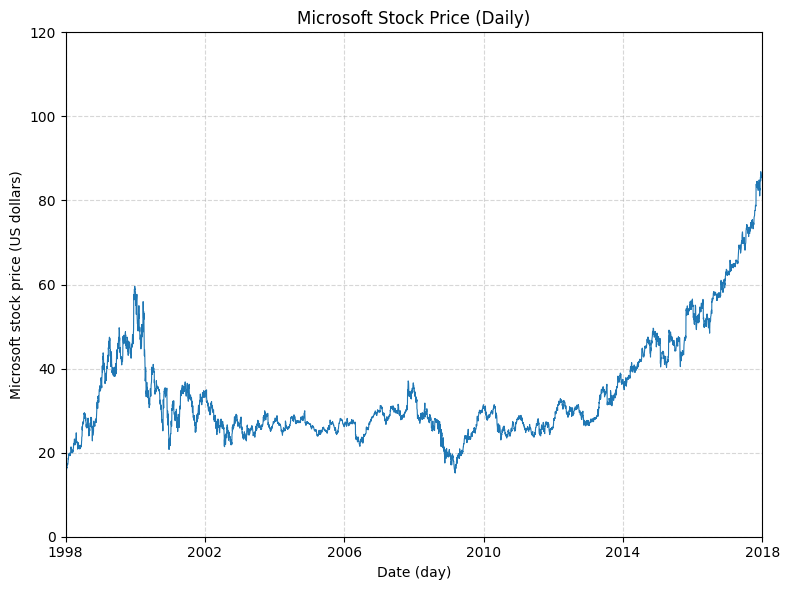

In [80]:
plt.figure(figsize=(8, 6))
plt.plot(data_daily["date"], data_daily["p_MSFT"], color="tab:blue", linewidth=0.8)
plt.ylim(0, 120)
plt.yticks(np.arange(0, 121, 20))
plt.xlim(limits)
years = np.linspace(1998, 2018, 6, dtype=int)
plt.xticks([pd.Timestamp(f"{y}-01-01") for y in years], years)
plt.xlabel("Date (day)")
plt.ylabel("Microsoft stock price (US dollars)")
plt.title("Microsoft Stock Price (Daily)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

(b) S&P500 index

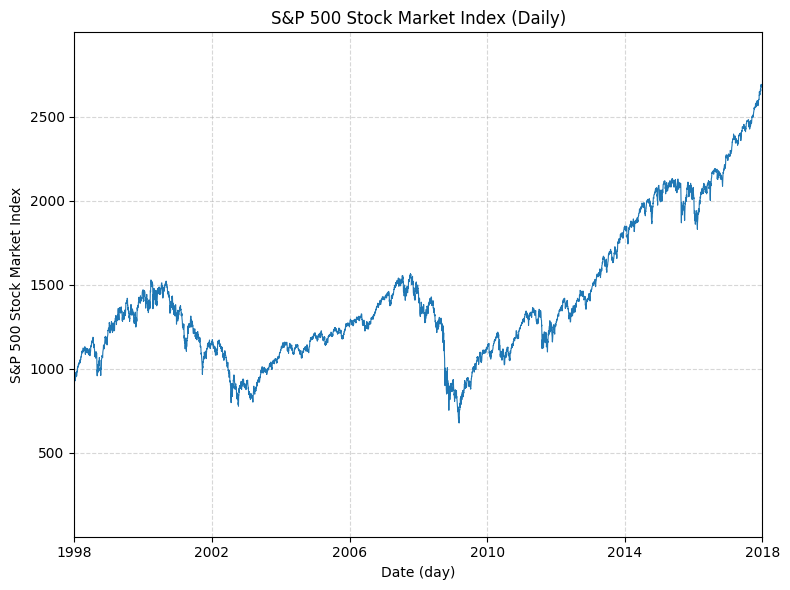

In [81]:
plt.figure(figsize=(8, 6))
plt.plot(data_daily["date"], data_daily["p_SP500"], color="tab:blue", linewidth=0.8)
plt.ylim(0, 3001)
plt.yticks(np.arange(500, 3000, 500))
plt.xlim(limits)
years = np.linspace(1998, 2018, 6, dtype=int)
plt.xticks([pd.Timestamp(f"{y}-01-01") for y in years], years)
plt.xlabel("Date (day)")
plt.ylabel("S&P 500 Stock Market Index")
plt.title("S&P 500 Stock Market Index (Daily)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [25]:
%pip install arch
from arch.unitroot import PhillipsPerron

Note: you may need to restart the kernel to use updated packages.


### Phillips Perron Unit Root

testing whether the Microsoft stock price series is stationary or not. If the test result shows a unit root, the series is non-stationary (its mean and variance change over time)


The Phillips-Perron test checks if a time series is stationary or has a unit root (is non-stationary).

If a series has a unit root, its mean and variance can change over time (like a random walk).
If it is stationary, its statistical properties stay the same over time.
In simple words:
Phillips-Perron tells you if your data (like stock prices) "wanders" over time or stays around a constant average. This is important for deciding how to model and forecast time series data.

In [83]:
print(PhillipsPerron(data_daily["p_MSFT"], lags=32, test_type="rho", trend="n"))
print(PhillipsPerron(data_daily["p_MSFT"], lags=32, test_type="rho", trend="c"))
print(PhillipsPerron(data_daily["p_MSFT"], lags=32, test_type="rho", trend="ct"))


     Phillips-Perron Test (Z-rho)    
Test Statistic                  2.261
P-value                         0.993
Lags                               32
-------------------------------------

Trend: No Trend
Critical Values: -13.24 (1%), -7.79 (5%), -5.54 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                  2.127
P-value                         0.998
Lags                               32
-------------------------------------

Trend: Constant
Critical Values: -20.60 (1%), -14.08 (5%), -11.24 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                 -0.204
P-value                         0.994
Lags                               32
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -29.31 (1%),

In [85]:
print(PhillipsPerron(data_daily["p_SP500"], lags=32, test_type="rho", trend="n")),
print(PhillipsPerron(data_daily["p_SP500"], lags=32, test_type="rho", trend="c")),
print(PhillipsPerron(data_daily["p_SP500"], lags=32, test_type="rho", trend="ct")),

     Phillips-Perron Test (Z-rho)    
Test Statistic                  0.918
P-value                         0.894
Lags                               32
-------------------------------------

Trend: No Trend
Critical Values: -13.24 (1%), -7.79 (5%), -5.54 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                 -0.314
P-value                         0.939
Lags                               32
-------------------------------------

Trend: Constant
Critical Values: -20.60 (1%), -14.08 (5%), -11.24 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                 -3.912
P-value                         0.896
Lags                               32
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -29.31 (1%),

(None,)

In [87]:
data_daily

,date,p_SP500,p_MSFT,year,month,lnp_MSFT,lnp_SP500
0,1997-12-29,953.349976,15.789063,1997,12,2.759317,6.859982
1,1997-12-30,970.840027,16.281250,1997,12,2.790014,6.878162
2,1997-12-31,970.429993,16.156250,1997,12,2.782307,6.877739
3,1998-01-02,975.039978,16.390625,1998,1,2.796710,6.882478
4,1998-01-05,977.070007,16.296875,1998,1,2.790973,6.884558
...,...,...,...,...,...,...,...
5282,2018-12-26,2467.699951,100.559998,2018,12,4.610755,7.811042
5283,2018-12-27,2488.830078,101.180000,2018,12,4.616901,7.819568
5284,2018-12-28,2485.739990,100.389999,2018,12,4.609063,7.818326
5285,2018-12-31,2506.850098,101.570000,2018,12,4.620748,7.826782


In [97]:
data_daily["l.p_MSFT"] = data_daily["p_MSFT"].shift() #shift down
data_daily["l.p_SP500"] = data_daily["p_SP500"].shift() #shoft down
data_daily["d.p_MSFT"] = data_daily["p_MSFT"] - data_daily["l.p_MSFT"] #diff
data_daily["d.p_SP500"] = data_daily["p_SP500"] - data_daily["l.p_SP500"] #diff
data_daily["PctRetMSFT"] = data_daily["d.p_MSFT"] / data_daily["l.p_MSFT"] * 100 #perc
data_daily["PctRetSP500"] = data_daily["d.p_SP500"] / data_daily["l.p_SP500"] * 100 #perc
data_daily

,date,p_SP500,p_MSFT,year,month,lnp_MSFT,lnp_SP500,l.p_MSFT,l.p_SP500,d.p_MSFT,d.p_SP500,PctRetMSFT,PctRetSP500
0,1997-12-29,953.349976,15.789063,1997,12,2.759317,6.859982,NaN,NaN,NaN,NaN,NaN,NaN
1,1997-12-30,970.840027,16.281250,1997,12,2.790014,6.878162,15.789063,953.349976,0.492187,17.490051,3.117265,1.834589
2,1997-12-31,970.429993,16.156250,1997,12,2.782307,6.877739,16.281250,970.840027,-0.125000,-0.410034,-0.767754,-0.042235
3,1998-01-02,975.039978,16.390625,1998,1,2.796710,6.882478,16.156250,970.429993,0.234375,4.609985,1.450677,0.475046
4,1998-01-05,977.070007,16.296875,1998,1,2.790973,6.884558,16.390625,975.039978,-0.093750,2.030029,-0.571973,0.208200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5282,2018-12-26,2467.699951,100.559998,2018,12,4.610755,7.811042,94.129997,2351.100098,6.430001,116.599853,6.830980,4.959374
5283,2018-12-27,2488.830078,101.180000,2018,12,4.616901,7.819568,100.559998,2467.699951,0.620002,21.130127,0.616549,0.856268
5284,2018-12-28,2485.739990,100.389999,2018,12,4.609063,7.818326,101.180000,2488.830078,-0.790001,-3.090088,-0.780788,-0.124158
5285,2018-12-31,2506.850098,101.570000,2018,12,4.620748,7.826782,100.389999,2485.739990,1.180001,21.110108,1.175417,0.849248


In [98]:
data_daily["d.lnp_MSFT"] = np.log(data_daily["p_MSFT"]) - np.log(data_daily["p_MSFT"].shift())
data_daily["d.lnp_SP500"] = np.log(data_daily["p_SP500"]) - np.log(data_daily["p_SP500"].shift())

In [33]:
data_monthly = (
    data_daily[["date", "year", "month", "p_SP500", "p_MSFT"]]
    .groupby(data_daily["date"].dt.to_period("M"))
    .last()
    .reset_index(drop=True)
)

In [34]:
data_monthly

,date,year,month,p_SP500,p_MSFT
0,1997-12-31,1997,12,970.429993,16.156250
1,1998-01-30,1998,1,980.280029,18.648438
2,1998-02-27,1998,2,1049.339966,21.187500
3,1998-03-31,1998,3,1101.750000,22.375000
4,1998-04-30,1998,4,1111.750000,22.531250
...,...,...,...,...,...
248,2018-08-31,2018,8,2901.520020,112.330002
249,2018-09-28,2018,9,2913.979980,114.370003
250,2018-10-31,2018,10,2711.739990,106.809998
251,2018-11-30,2018,11,2760.169922,110.889999


In [35]:
data_monthly["l.p_MSFT"] = data_monthly["p_MSFT"].shift()
data_monthly["l.p_SP500"] = data_monthly["p_SP500"].shift()
data_monthly["d.p_MSFT"] = data_monthly["p_MSFT"] - data_monthly["l.p_MSFT"]
data_monthly["d.p_SP500"] = data_monthly["p_SP500"] - data_monthly["l.p_SP500"]
data_monthly["PctRetMSFT"] = data_monthly["d.p_MSFT"] / data_monthly["l.p_MSFT"] * 100
data_monthly["PctRetSP500"] = (
    data_monthly["d.p_SP500"] / data_monthly["l.p_SP500"] * 100
)

In [36]:
data_monthly["d.lnp_MSFT"] = np.log(data_monthly["p_MSFT"]) - np.log(
    data_monthly["p_MSFT"].shift()
)
data_monthly["d.lnp_SP500"] = np.log(data_monthly["p_SP500"]) - np.log(
    data_monthly["p_SP500"].shift()
)

In [37]:
data_daily.head()

,date,p_SP500,p_MSFT,year,month,lnp_MSFT,lnp_SP500,l.p_MSFT,l.p_SP500,d.p_MSFT,d.p_SP500,PctRetMSFT,PctRetSP500,d.lnp_MSFT,d.lnp_SP500
0,1997-12-31,970.429993,16.156250,1997,12,2.782307,6.877739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998-01-02,975.039978,16.390625,1998,1,2.796710,6.882478,16.156250,970.429993,0.234375,4.609985,1.450677,0.475046,0.014403,0.004739
2,1998-01-05,977.070007,16.296875,1998,1,2.790973,6.884558,16.390625,975.039978,-0.093750,2.030029,-0.571973,0.208200,-0.005736,0.002080
3,1998-01-06,966.580017,16.390625,1998,1,2.796710,6.873764,16.296875,977.070007,0.093750,-10.489990,0.575264,-1.073617,0.005736,-0.010794
4,1998-01-07,964.000000,16.195313,1998,1,2.784722,6.871091,16.390625,966.580017,-0.195312,-2.580017,-1.191608,-0.266922,-0.011988,-0.002673


In [38]:
data_monthly.head()

,date,year,month,p_SP500,p_MSFT,l.p_MSFT,l.p_SP500,d.p_MSFT,d.p_SP500,PctRetMSFT,PctRetSP500,d.lnp_MSFT,d.lnp_SP500
0,1997-12-31,1997,12,970.429993,16.156250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998-01-30,1998,1,980.280029,18.648438,16.156250,970.429993,2.492188,9.850036,15.425535,1.015018,0.143455,0.010099
2,1998-02-27,1998,2,1049.339966,21.187500,18.648438,980.280029,2.539062,69.059937,13.615414,7.044919,0.127649,0.068078
3,1998-03-31,1998,3,1101.750000,22.375000,21.187500,1049.339966,1.187500,52.410034,5.604720,4.994571,0.054533,0.048738
4,1998-04-30,1998,4,1111.750000,22.531250,22.375000,1101.750000,0.156250,10.000000,0.698324,0.907647,0.006959,0.009036


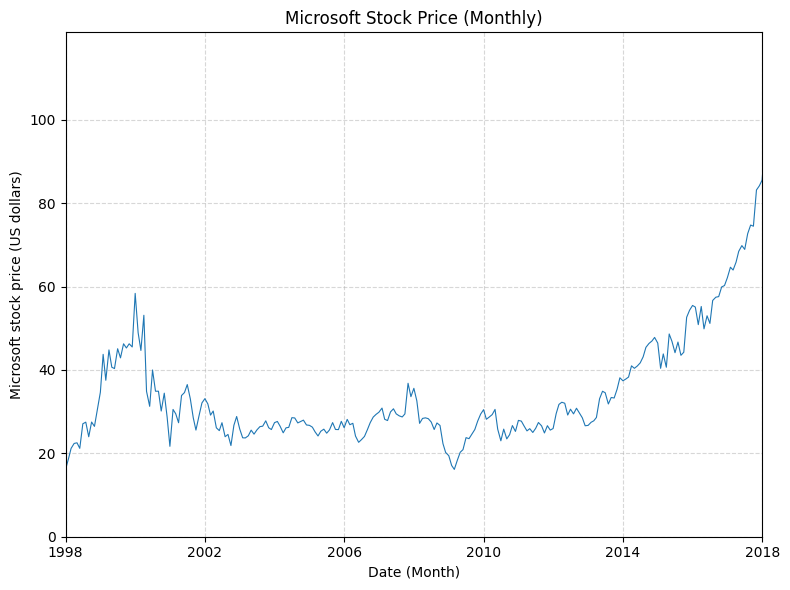

In [39]:
plt.figure(figsize=(8, 6))
plt.plot(data_monthly["date"], data_monthly["p_MSFT"], color="tab:blue", linewidth=0.8)
plt.ylim(0, 121)
plt.yticks(np.arange(0, 120, 20))
plt.xlim(limits)
years = np.linspace(1998, 2018, 6, dtype=int)
plt.xticks([pd.Timestamp(f"{y}-01-01") for y in years], years)
plt.xlabel("Date (Month)")
plt.ylabel("Microsoft stock price (US dollars)", x="Date (Month)")
plt.title("Microsoft Stock Price (Monthly)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

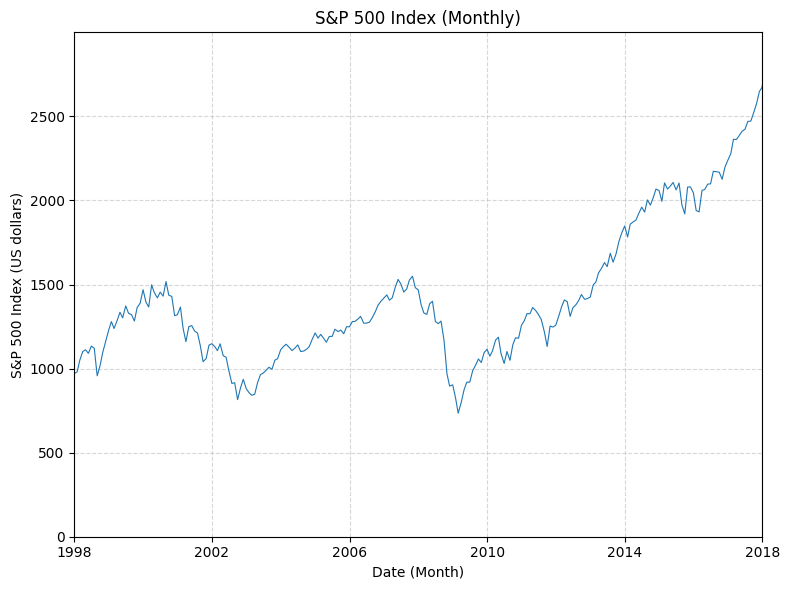

In [40]:
plt.figure(figsize=(8, 6))
plt.plot(data_monthly["date"], data_monthly["p_SP500"], color="tab:blue", linewidth=0.8)
plt.ylim(0, 3000)
plt.yticks(np.arange(0, 3000, 500))
plt.xlim(limits)
years = np.linspace(1998, 2018, 6, dtype=int)
plt.xticks([pd.Timestamp(f"{y}-01-01") for y in years], years)
plt.xlabel("Date (Month)")
plt.ylabel("S&P 500 Index (US dollars)", x="Date (Month)")
plt.title("S&P 500 Index (Monthly)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [41]:
print(PhillipsPerron(data_daily["p_MSFT"], lags=32, test_type="rho", trend="n"))
print(PhillipsPerron(data_daily["p_MSFT"], lags=32, test_type="rho", trend="c"))
print(PhillipsPerron(data_daily["p_MSFT"], lags=32, test_type="rho", trend="ct"))


     Phillips-Perron Test (Z-rho)    
Test Statistic                  2.287
P-value                         0.994
Lags                               32
-------------------------------------

Trend: No Trend
Critical Values: -13.24 (1%), -7.79 (5%), -5.54 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                  2.245
P-value                         0.998
Lags                               32
-------------------------------------

Trend: Constant
Critical Values: -20.60 (1%), -14.08 (5%), -11.24 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                 -0.092
P-value                         0.995
Lags                               32
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -29.31 (1%),

In [42]:
print(PhillipsPerron(data_daily["p_SP500"], lags=32, test_type="rho", trend="n"))
print(PhillipsPerron(data_daily["p_SP500"], lags=32, test_type="rho", trend="c"))
print(PhillipsPerron(data_daily["p_SP500"], lags=32, test_type="rho", trend="ct"))


     Phillips-Perron Test (Z-rho)    
Test Statistic                  0.908
P-value                         0.892
Lags                               32
-------------------------------------

Trend: No Trend
Critical Values: -13.24 (1%), -7.79 (5%), -5.54 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                 -0.292
P-value                         0.940
Lags                               32
-------------------------------------

Trend: Constant
Critical Values: -20.60 (1%), -14.08 (5%), -11.24 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                 -3.943
P-value                         0.894
Lags                               32
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -29.31 (1%),

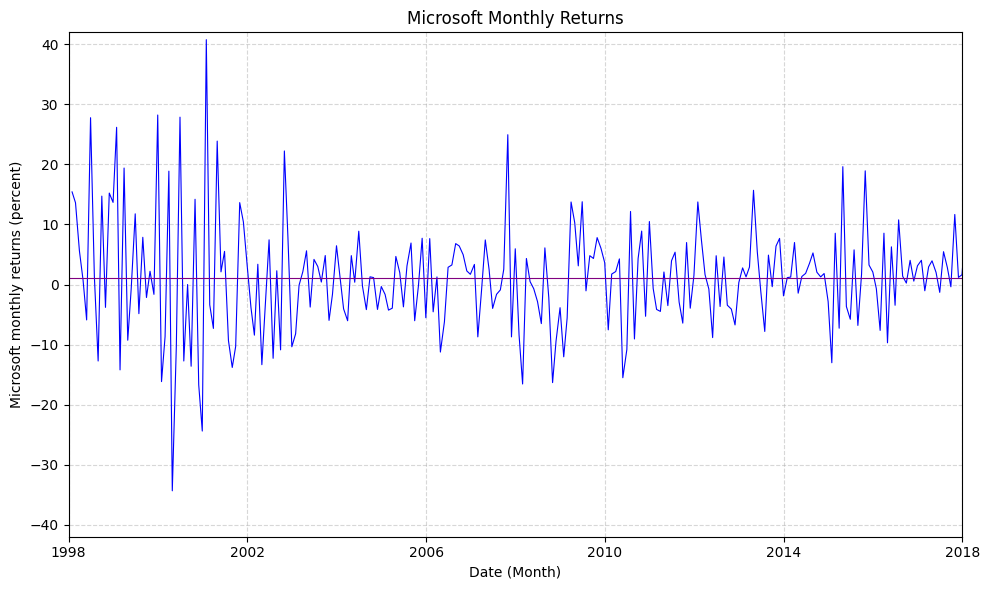

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(data_monthly["date"], data_monthly["PctRetMSFT"], color="blue", linewidth=0.8)
plt.axhline(y=1.13, color="purple", linewidth=0.8)
plt.ylim(-42, 42)
plt.xlim(limits)
years = np.linspace(limits[0].year, limits[1].year, 6, dtype=int)
plt.xticks([pd.Timestamp(f"{y}-01-01") for y in years], years)
plt.xlabel("Date (Month)")
plt.ylabel("Microsoft monthly returns (percent)")
plt.title("Microsoft Monthly Returns")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


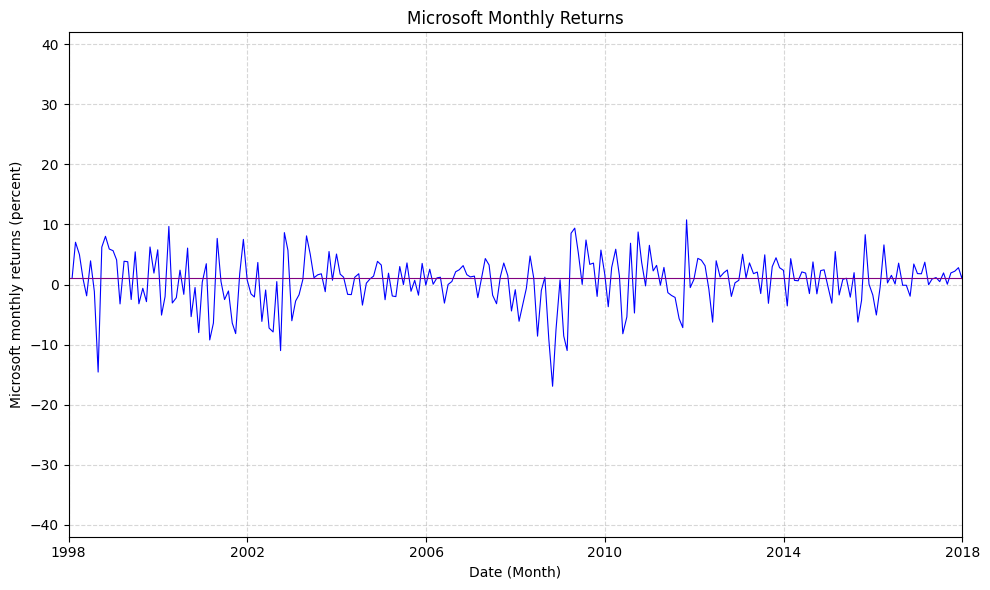

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(data_monthly["date"], data_monthly["PctRetSP500"], color="blue", linewidth=0.8)
plt.axhline(y=1.13, color="purple", linewidth=0.8)
plt.ylim(-42, 42)
plt.xlim(limits)
years = np.linspace(limits[0].year, limits[1].year, 6, dtype=int)
plt.xticks([pd.Timestamp(f"{y}-01-01") for y in years], years)
plt.xlabel("Date (Month)")
plt.ylabel("Microsoft monthly returns (percent)")
plt.title("Microsoft Monthly Returns")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


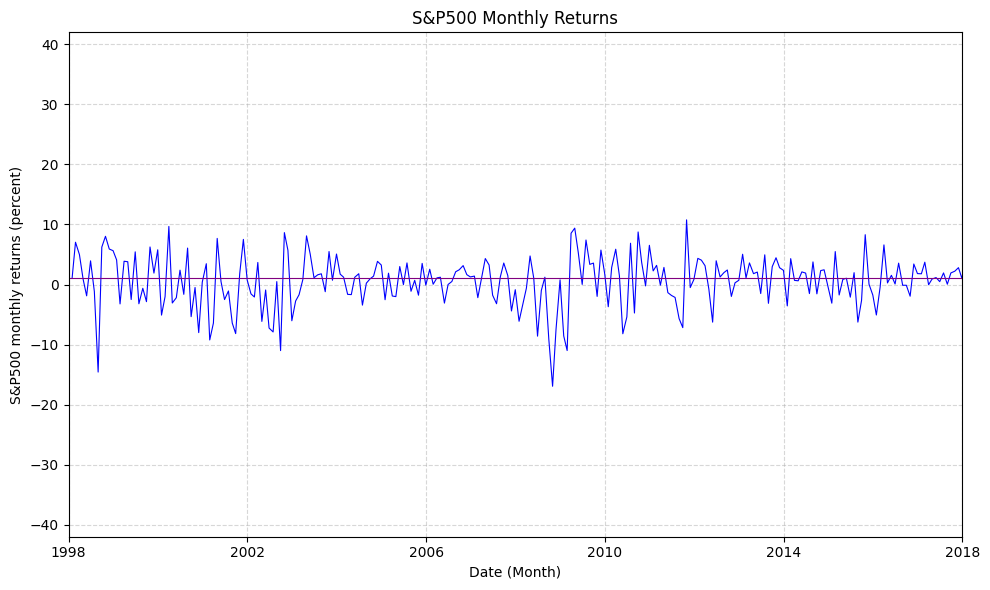

In [45]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(x="date", y="PctRetSP500", data=data_monthly, color="blue", linewidth=0.8)
plt.axhline(y=1.13, color="purple", linewidth=0.8)
plt.ylim(-42, 42)
plt.xlim(limits)
years = np.linspace(limits[0].year, limits[1].year, 6, dtype=int)
plt.xticks([pd.Timestamp(f"{y}-01-01") for y in years], years)
plt.xlabel("Date (Month)")
plt.ylabel("S&P500 monthly returns (percent)")
plt.title("S&P500 Monthly Returns")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [46]:
data_monthly.head(2)


,date,year,month,p_SP500,p_MSFT,l.p_MSFT,l.p_SP500,d.p_MSFT,d.p_SP500,PctRetMSFT,PctRetSP500,d.lnp_MSFT,d.lnp_SP500
0,1997-12-31,1997,12,970.429993,16.156250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998-01-30,1998,1,980.280029,18.648438,16.15625,970.429993,2.492188,9.850036,15.425535,1.015018,0.143455,0.010099


In [47]:
print(
    PhillipsPerron(
        data_monthly.loc[1:, "PctRetMSFT"], lags=5, test_type="rho", trend="n"
    )
)
print(
    PhillipsPerron(
        data_monthly.loc[1:, "PctRetMSFT"], lags=5, test_type="rho", trend="c"
    )
)
print(
    PhillipsPerron(
        data_monthly.loc[1:, "PctRetMSFT"], lags=5, test_type="rho", trend="ct"
    )
)


     Phillips-Perron Test (Z-rho)    
Test Statistic               -285.235
P-value                         0.000
Lags                                5
-------------------------------------

Trend: No Trend
Critical Values: -12.12 (1%), -7.03 (5%), -4.96 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic               -280.444
P-value                         0.000
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -20.16 (1%), -13.86 (5%), -11.10 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic               -280.268
P-value                         0.000
Lags                                5
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -28.45 (1%),

In [48]:
print(
    PhillipsPerron(
        data_monthly.loc[1:, "PctRetSP500"], lags=5, test_type="rho", trend="n"
    )
)
print(
    PhillipsPerron(
        data_monthly.loc[1:, "PctRetSP500"], lags=5, test_type="rho", trend="c"
    )
)
print(
    PhillipsPerron(
        data_monthly.loc[1:, "PctRetSP500"], lags=5, test_type="rho", trend="ct"
    )
)


     Phillips-Perron Test (Z-rho)    
Test Statistic               -234.376
P-value                         0.000
Lags                                5
-------------------------------------

Trend: No Trend
Critical Values: -12.12 (1%), -7.03 (5%), -4.96 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic               -233.937
P-value                         0.000
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -20.16 (1%), -13.86 (5%), -11.10 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic               -233.518
P-value                         0.000
Lags                                5
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -28.45 (1%),

### Table 12.1 Descriptive statistics on monthly returns

In [49]:
results = (
    data_monthly[["PctRetMSFT", "PctRetSP500"]]
    .describe()
    .T[["min", "max", "mean", "std", "count"]]
    .rename(columns={"std": "sd", "count": "N"})
)
results.index = ["Monthly returns on Microsoft (%)", "Monthly returns on S&P500 (%)"]
results.round(1)


,min,max,mean,sd,N
Monthly returns on Microsoft (%),-34.4,40.8,1.1,9.1,252.0
Monthly returns on S&P500 (%),-16.9,10.8,0.5,4.3,252.0


In [58]:
data_monthly

,date,year,month,p_SP500,p_MSFT,l.p_MSFT,l.p_SP500,d.p_MSFT,d.p_SP500,PctRetMSFT,PctRetSP500,d.lnp_MSFT,d.lnp_SP500
0,1997-12-31,1997,12,970.429993,16.156250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998-01-30,1998,1,980.280029,18.648438,16.156250,970.429993,2.492188,9.850036,15.425535,1.015018,0.143455,0.010099
2,1998-02-27,1998,2,1049.339966,21.187500,18.648438,980.280029,2.539062,69.059937,13.615414,7.044919,0.127649,0.068078
3,1998-03-31,1998,3,1101.750000,22.375000,21.187500,1049.339966,1.187500,52.410034,5.604720,4.994571,0.054533,0.048738
4,1998-04-30,1998,4,1111.750000,22.531250,22.375000,1101.750000,0.156250,10.000000,0.698324,0.907647,0.006959,0.009036
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2018-08-31,2018,8,2901.520020,112.330002,106.080002,2816.290039,6.250000,85.229981,5.891780,3.026321,0.057247,0.029814
249,2018-09-28,2018,9,2913.979980,114.370003,112.330002,2901.520020,2.040001,12.459960,1.816078,0.429429,0.017998,0.004285
250,2018-10-31,2018,10,2711.739990,106.809998,114.370003,2913.979980,-7.560005,-202.239990,-6.610129,-6.940336,-0.068387,-0.071929
251,2018-11-30,2018,11,2760.169922,110.889999,106.809998,2711.739990,4.080001,48.429932,3.819868,1.785936,0.037487,0.017702


In [ ]:
reg1 = smf.ols("PctRetMSFT ~ PctRetSP500", data=data_monthly).fit()

reg2 = smf.ols("d_lnp_MSFT ~ d_lnp_SP500", data=data_monthly.rename(
        columns={"d.lnp_MSFT": "d_lnp_MSFT", "d.lnp_SP500": "d_lnp_SP500"}
    ),
).fit()


reg3 = smf.ols("PctRetMSFT ~ PctRetSP500", data=data_daily).fit()

reg4 = smf.ols("d_lnp_MSFT ~ d_lnp_SP500", data=data_daily.rename(
        columns={"d.lnp_MSFT": "d_lnp_MSFT", "d.lnp_SP500": "d_lnp_SP500"}
    ),
).fit()


In [51]:
print(reg1.get_robustcov_results(cov_type="HC1").summary())


                            OLS Regression Results                            
Dep. Variable:             PctRetMSFT   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     150.5
Date:                Fri, 18 Jul 2025   Prob (F-statistic):           2.14e-27
Time:                        01:18:16   Log-Likelihood:                -857.14
No. Observations:                 252   AIC:                             1718.
Df Residuals:                     250   BIC:                             1725.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.5396      0.453      1.191      

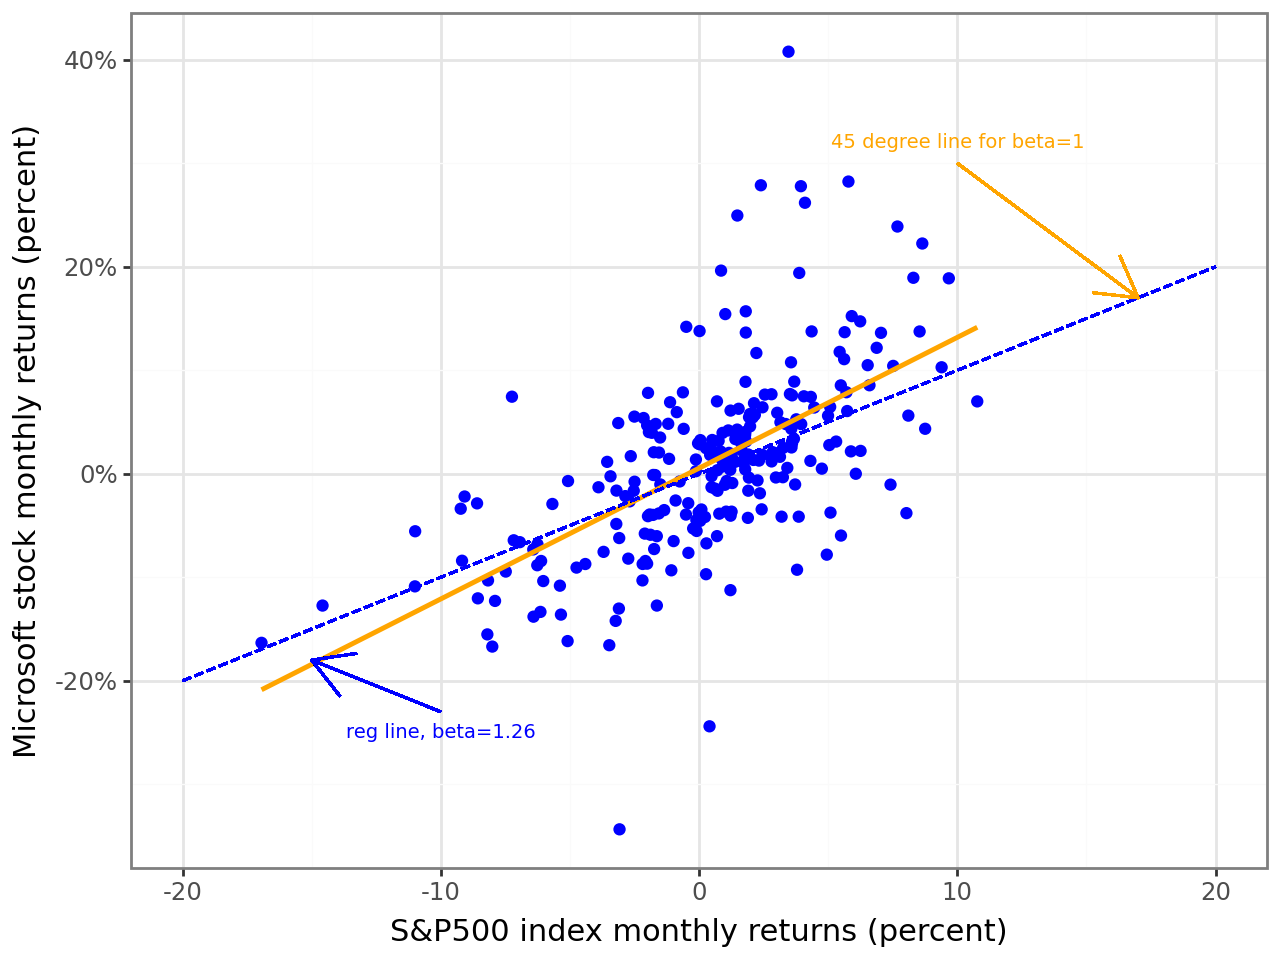

In [52]:
(
    ggplot(data_monthly, aes(x="PctRetSP500", y="PctRetMSFT / 100"))
    + geom_point(color="blue")
    + geom_smooth(method="lm", se=False, color="orange")
    + labs(
        x="S&P500 index monthly returns (percent)",
        y="Microsoft stock monthly returns (percent)",
    )
    + scale_y_continuous(labels=percent_format())
    + theme_bw()
    + geom_segment(
        aes(x=-20, y=-0.2, xend=20, yend=0.2),
        color="blue",
        size=0.5,
        linetype="dashed",
    )
    + geom_segment(aes(x=10, y=0.3, xend=17, yend=0.17), color="orange", arrow=arrow())
    + annotate(
        "text", x=10, y=0.32, size=7, label="45 degree line for beta=1", color="orange"
    )
    + geom_segment(
        aes(x=-10, y=-0.23, xend=-15, yend=-0.18), color="blue", arrow=arrow()
    )
    + annotate(
        "text", x=-10, y=-0.25, size=7, color="blue", label="reg line, beta=1.26"
    )
)

In [53]:
data_monthly_tidy = pd.melt(
    data_monthly[["date", "PctRetMSFT", "PctRetSP500"]],
    id_vars=["date"],
    var_name="index",
    value_name="pct_return",
)


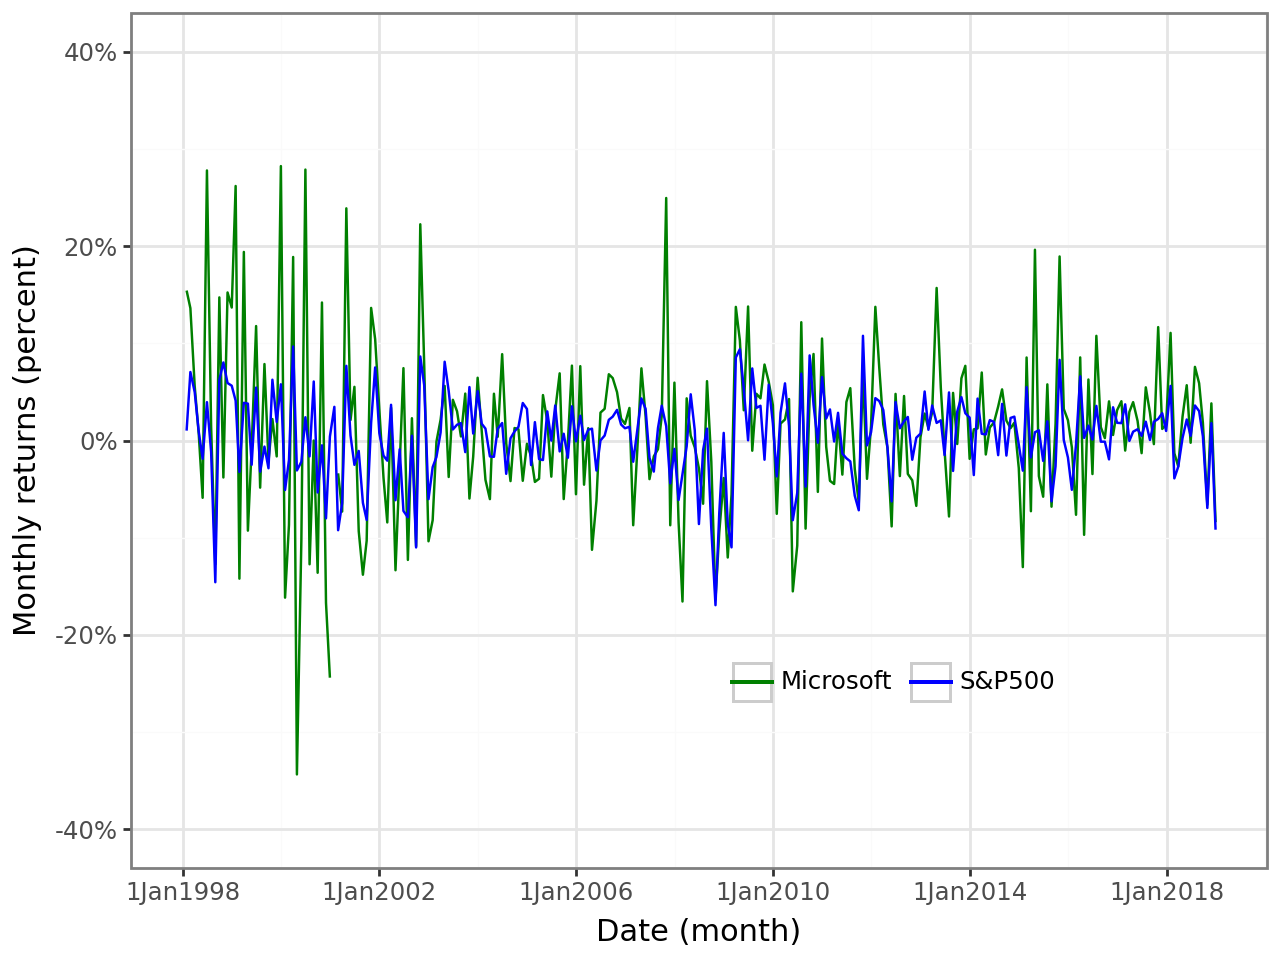

In [55]:
(
    ggplot(data_monthly_tidy)
    + geom_line(aes(x="date", y="pct_return / 100", color="index"), size=0.5)
    + scale_color_manual(
        name="", values=["green", "blue"], labels=["Microsoft", "S&P500"]
    )
    + labs(x="Date (month)", y="Monthly returns (percent)")
    + scale_y_continuous(limits=(-0.40, 0.40), labels=percent_format())
    + scale_x_date(breaks=breaks(limits)[::2], labels=date_format("1%b%Y"))
    + theme_bw()
    + theme(
        legend_position=(0.74, 0.2),
        legend_direction="horizontal",
        legend_background=element_blank(),
        legend_title=element_blank()
    )
)

In [56]:
data_monthly_tidy_17_18 = data_monthly_tidy.loc[
    data_monthly_tidy["date"] > "2017-01-01"
]

In [57]:
breaks = date_breaks('6 month')
limits = datetime(2017, 1, 1), datetime(2019, 1, 1)

In [ ]:
(
    ggplot(data_monthly_tidy_17_18.reset_index())
    + geom_line(aes(x="date", y="pct_return / 100", color="index"), size=0.5)
    + scale_color_manual(
        name="", values=[color[0], color[1]], labels=["Microsoft", "S&P500"]
    )
    + labs(x="Date (month)", y="Monthly returns (percent)")
    + scale_y_continuous(
        expand=[0.01, 0.01],
        limits=[-0.12, 0.12],
        breaks=seq(-0.12, 0.12, 0.04),
        labels=percent_format(),
    )
    + scale_x_date(breaks=breaks(limits), labels=date_format("%b%Y"))
    + theme_bw()
    + theme(
        legend_position=(0.74, 0.2),
        legend_direction="horizontal",
        legend_background=element_blank(),
        legend_title=element_blank(),
    )
)

In [ ]:
# Regressions


In [ ]:
print(reg2.get_robustcov_results(cov_type="HC1").summary())


In [ ]:
print(reg3.get_robustcov_results(cov_type="HC1").summary())


In [ ]:
print(reg4.get_robustcov_results(cov_type="HC1").summary())


In [ ]:
reg1 = smf.ols("PctRetMSFT ~ PctRetSP500", data=data_monthly).fit()
reg2 = smf.ols(
    "d_lnp_MSFT ~ d_lnp_SP500",
    data=data_monthly.rename(
        columns={"d.lnp_MSFT": "d_lnp_MSFT", "d.lnp_SP500": "d_lnp_SP500"}
    ),
).fit()
reg3 = smf.ols("PctRetMSFT ~ PctRetSP500", data=data_daily).fit()
reg4 = smf.ols(
    "d_lnp_MSFT ~ d_lnp_SP500",
    data=data_daily.rename(
        columns={"d.lnp_MSFT": "d_lnp_MSFT", "d.lnp_SP500": "d_lnp_SP500"}
    ),
).fit()


### Table 12.3 Returns on Microsoft and market returns: alternative measurements

In [ ]:
stargazer = Stargazer([reg1, reg2, reg3, reg4])
stargazer.covariate_order(["PctRetSP500", "d_lnp_SP500", "Intercept"])
stargazer.rename_covariates(
    {
        "Intercept": "Constant",
        "PctRetSP500": "S&P500 returns",
        "d_lnp_SP500": "S&P500 returns",
    }
)
stargazer.custom_columns(
    [
        "Monthly pct change",
        "Monthly log change",
        "Daily pct change",
        "Daily log change",
    ],
    [1, 1, 1, 1],
)
stargazer
